<a href="https://colab.research.google.com/github/chenirene00/Logistic_Regression/blob/master/Banking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries and Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank_marketing_dataset.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

#Understand and Analyze the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

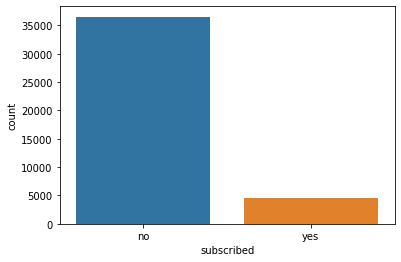

In [ ]:
sns.countplot(x='subscribed', data=df)

<AxesSubplot:xlabel='job', ylabel='count'>

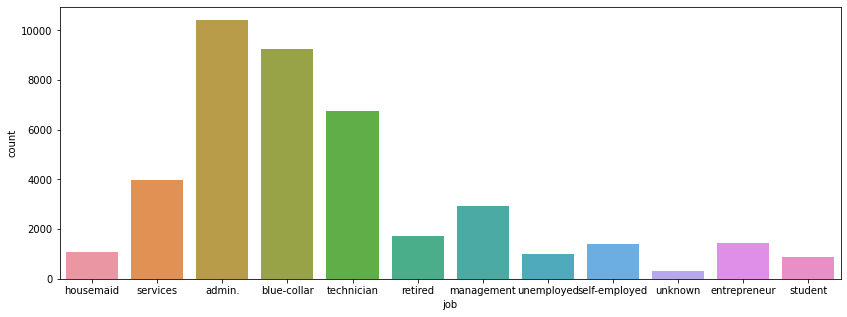

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='job', data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

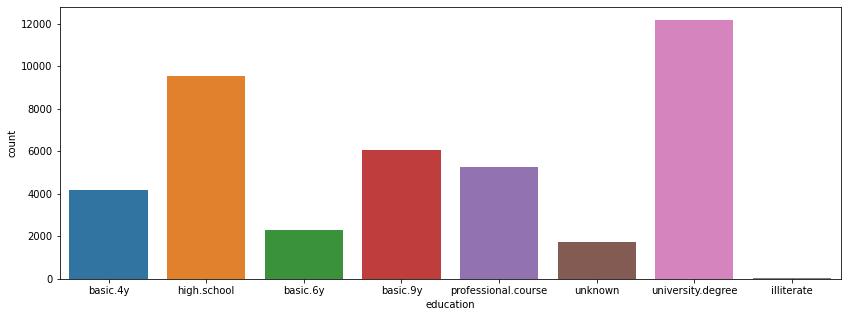

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='education', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

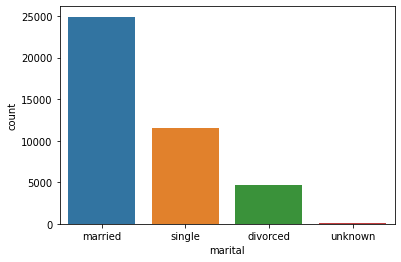

In [ ]:
sns.countplot(x='marital',data=df)

<AxesSubplot:xlabel='housing', ylabel='count'>

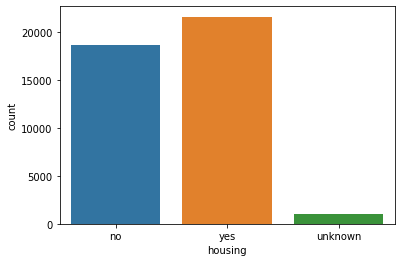

In [ ]:
sns.countplot(x='housing',data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

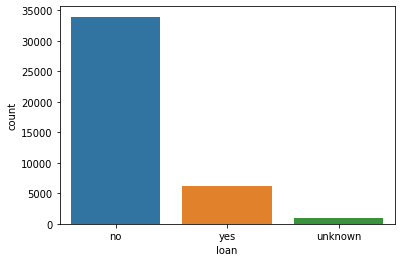

In [ ]:
sns.countplot(x='loan',data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

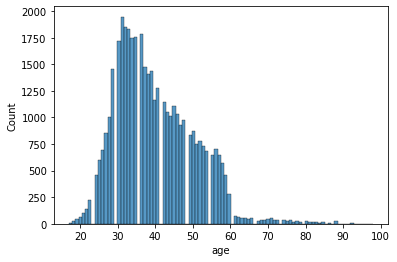

In [ ]:
sns.histplot(x='age',data =df)

1. There's no missing values
2. The data is skewed for duration,campaign and age
3. There might be outliers in duration and pdays



#Treat Ouliers

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
np.percentile(df.duration,[99])[0]

1271.1299999999974

In [ ]:
upper_limit_du = np.percentile(df.duration,[99])[0]

In [ ]:
df[(df.duration>upper_limit_du)]['duration']

37       1666.0
75       1575.0
88       1467.0
164      2033.0
446      1623.0
          ...  
40764    1334.0
40836    1616.0
40838    1298.0
41123    1556.0
41164    1868.0
Name: duration, Length: 412, dtype: float64

In [ ]:
df.duration[(df.duration>3*upper_limit_du)] 

Series([], Name: duration, dtype: float64)

In [ ]:
df.duration[(df.duration>3*upper_limit_du)] = 3*upper_limit_du

<ipython-input-54-b2067095b6ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.duration[(df.duration>3*upper_limit_du)] = 3*upper_limit_du


In [ ]:
np.percentile(df.pdays,[1])

array([3.])

In [ ]:
lower_limit_pd = np.percentile(df.pdays,[1])[0]

In [ ]:
df.pdays[df.pdays<lower_limit_pd*0.3]

25497    0
25996    0
30238    0
30314    0
30417    0
30688    0
40360    0
40364    0
40365    0
40376    0
40380    0
40382    0
40384    0
40387    0
40534    0
Name: pdays, dtype: int64

In [ ]:
df.pdays[df.pdays<lower_limit_pd*0.3] = lower_limit_pd*0.3

<ipython-input-59-90526d0ab42b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pdays[df.pdays<lower_limit_pd*0.3] = lower_limit_pd*0.3


In [ ]:
df.pdays[df.pdays<lower_limit_pd*0.3]

Series([], Name: pdays, dtype: float64)

#Categorical Variable Encoding



In [ ]:
df = df.drop(['contact','month','day_of_week'],axis=1)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,1,0
1,57,149.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,1,0
2,37,226.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,1,0,0,0,1,0,1,0
3,40,151.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,1,0
4,56,307.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_unknown',
       'housing_no', 'housing_unknown', 'loan_no', 'loan_unknown',
       'poutcome_nonexistent', 'subscribed_no'],
      dtype='object')

In [ ]:
df = df.drop(['job_unknown','marital_unknown','education_unknown','default_yes','housing_yes','loan_yes','poutcome_success','subscribed_yes'],axis=1)

In [ ]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_university.degree,default_no,default_unknown,housing_no,housing_unknown,loan_no,loan_unknown,poutcome_failure,poutcome_nonexistent,subscribed_no
0,56,261.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,1,0,0,1,1
1,57,149.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,1,0,1,0,0,1,1
2,37,226.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,1
3,40,151.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,1,0,0,1,1
4,56,307.0,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,0,0,0,1,1


# Find the correlation

In [ ]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_university.degree,default_no,default_unknown,housing_no,housing_unknown,loan_no,loan_unknown,poutcome_failure,poutcome_nonexistent,subscribed_no
age,1.000000,-0.000839,0.004594,-0.034370,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,-0.071138,-0.165019,0.165001,0.001755,-0.001092,0.007224,-0.001092,-0.002537,-0.016376,-0.030399
duration,-0.000839,1.000000,-0.071802,-0.047708,0.020734,-0.028047,0.005399,-0.008191,-0.033043,-0.044872,...,-0.012578,0.011647,-0.011541,0.008406,-0.004885,0.001796,-0.004885,-0.013293,-0.011746,-0.406088
campaign,0.004594,-0.071802,1.000000,0.052583,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,-0.000950,-0.032923,0.033007,0.010959,-0.000396,-0.004831,-0.000396,-0.068890,0.087645,0.066357
pdays,-0.034370,-0.047708,0.052583,1.000000,-0.587513,0.271005,0.078890,-0.091343,0.296900,0.372605,...,-0.036957,-0.080072,0.080048,0.010129,0.002033,-0.000737,0.002033,0.006354,0.491353,0.324914
previous,0.024365,0.020734,-0.079141,-0.587513,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,0.025419,0.102533,-0.102604,-0.021677,0.003769,0.000504,0.003769,0.682608,-0.878776,-0.230181
emp.var.rate,-0.000371,-0.028047,0.150754,0.271005,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,...,-0.045331,-0.203285,0.203218,0.059100,0.003152,-0.002392,0.003152,-0.381706,0.472501,0.298334
cons.price.idx,0.000857,0.005399,0.127836,0.078890,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,...,-0.091954,-0.168234,0.168322,0.077170,0.016361,-0.000982,0.016361,-0.297718,0.304264,0.136211
cons.conf.idx,0.129372,-0.008191,-0.013733,-0.091343,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,...,0.073705,-0.026443,0.026352,0.032388,0.007236,0.009975,0.007236,-0.162592,0.099724,-0.054878
euribor3m,0.010767,-0.033043,0.135133,0.296900,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,...,-0.034208,-0.195337,0.195251,0.058233,0.002873,-0.000697,0.002873,-0.385417,0.488406,0.307771
nr.employed,-0.017725,-0.044872,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,...,-0.034143,-0.189829,0.189728,0.045590,-0.001257,-0.003458,-0.001257,-0.349602,0.493051,0.354678


In [ ]:
df_corr = df.corr()

<AxesSubplot:>

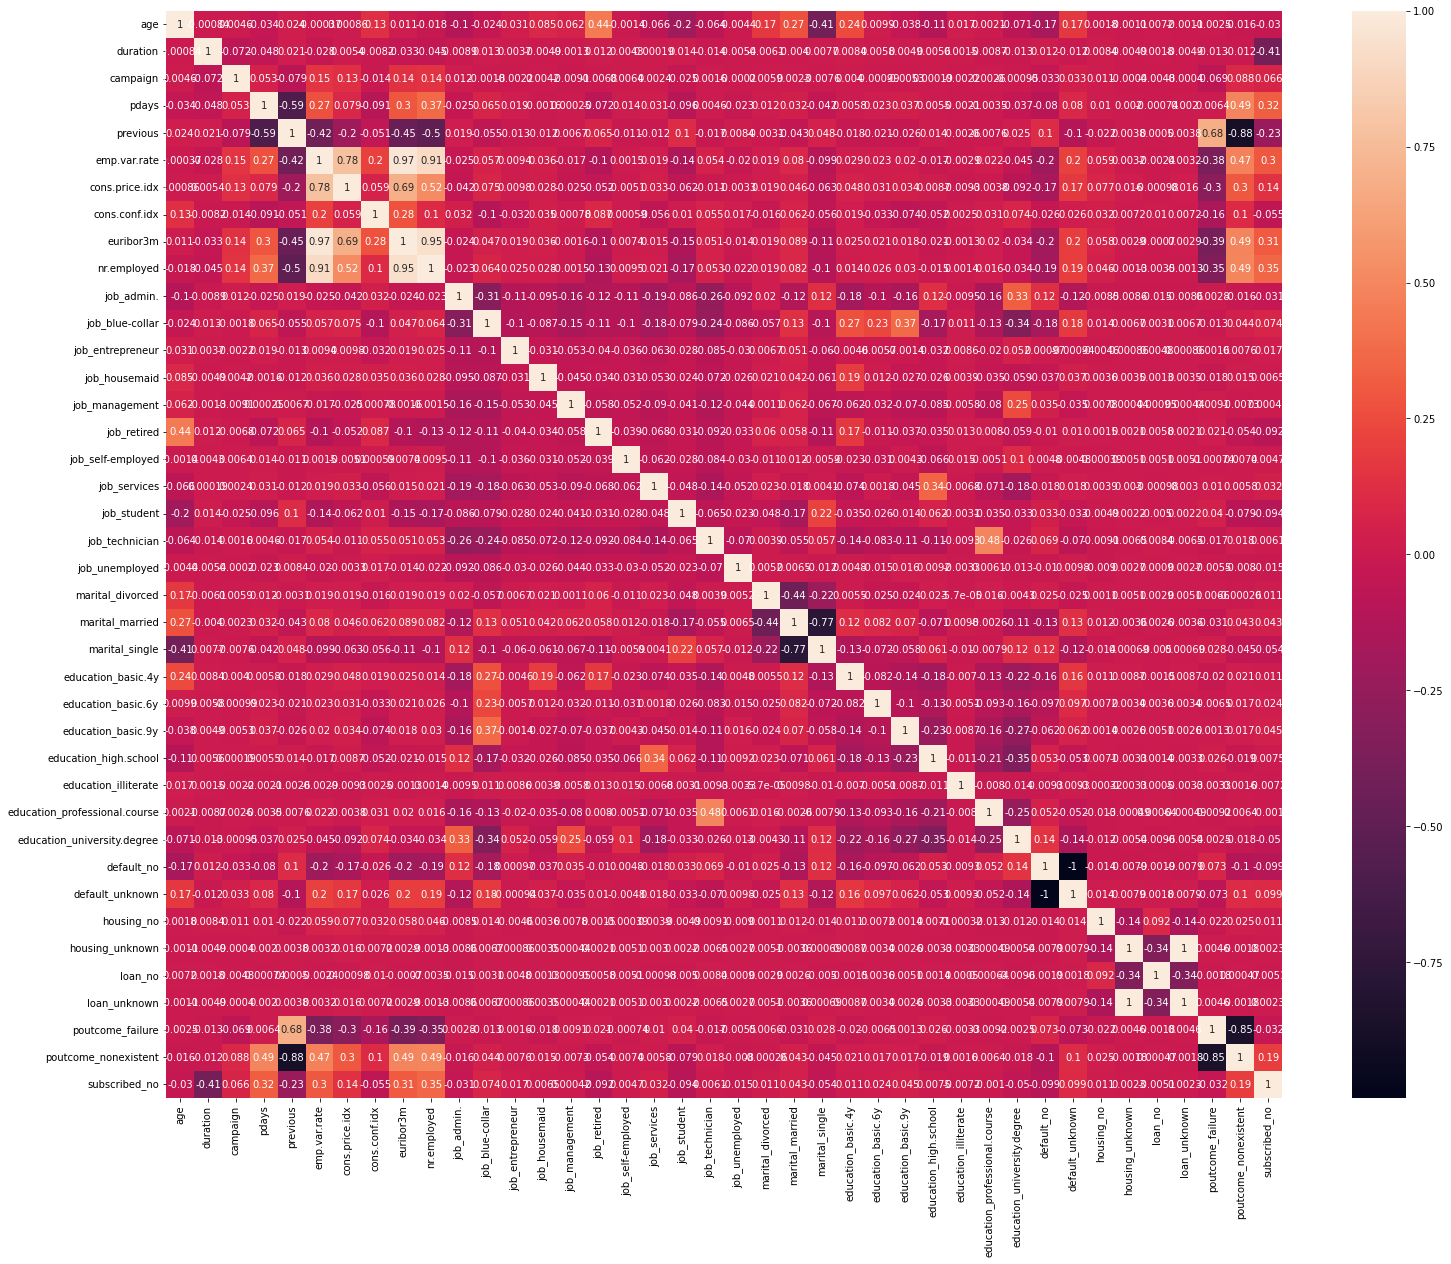

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df_corr,annot=True)

In [ ]:
corr_sub = abs(df_corr['subscribed_no'])

In [ ]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'housing_no', 'housing_unknown', 'loan_no',
       'loan_unknown', 'subscribed_no'],
      dtype='object')

In [ ]:
df =  df.drop(['emp.var.rate','euribor3m','default_unknown','poutcome_nonexistent'],axis=1)

In [ ]:
df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,housing_no,housing_unknown,loan_no,loan_unknown,subscribed_no
0,56,261.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,1,1,0,1,0,1
1,57,149.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,37,226.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,1,0,1
3,40,151.0,1,999.0,0,93.994,-36.4,5191.0,1,0,...,0,0,0,0,1,1,0,1,0,1
4,56,307.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,1,0,0,0,1


#Preliminary Training

In [ ]:
X= df.drop(['subscribed_no'],axis=1)
X.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,housing_no,housing_unknown,loan_no,loan_unknown
0,56,261.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,57,149.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,226.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,40,151.0,1,999.0,0,93.994,-36.4,5191.0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,56,307.0,1,999.0,0,93.994,-36.4,5191.0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
y = df['subscribed_no']
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: subscribed_no, Length: 41188, dtype: uint8

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier.coef_

array([[-4.97548502e-03, -4.28134428e-03,  1.22452667e-01,
         1.64040313e-03, -4.76332655e-02, -6.12491794e-01,
        -5.59444564e-02,  1.11061002e-02, -4.54232598e-02,
         8.00188549e-02,  7.93759300e-03,  3.95878507e-03,
        -7.41960603e-04, -3.47470811e-02,  9.26430756e-04,
         2.12752522e-02, -3.19027797e-02, -5.54514629e-03,
        -5.71743893e-03,  9.24211938e-03,  5.59503990e-02,
        -7.45571107e-02,  1.95793054e-02,  1.40706967e-02,
         3.93420037e-02,  6.47386174e-03, -4.79913234e-04,
        -5.61910543e-03, -7.50155443e-02, -1.10107620e-01,
         1.46820915e-02,  6.24492168e-04, -1.60114036e-02,
         6.24492168e-04]])

In [ ]:
classifier.intercept_

array([-0.00951252])

#Predict and confusion matrix


In [ ]:
classifier.predict_proba(X)

array([[0.08007805, 0.91992195],
       [0.04608264, 0.95391736],
       [0.06445287, 0.93554713],
       ...,
       [0.37036983, 0.62963017],
       [0.62293296, 0.37706704],
       [0.40824615, 0.59175385]])

In [ ]:
y_pred = classifier.predict(X)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [ ]:
y_pred_03 = (classifier.predict_proba(X)[:,1] >=0.3)
y_pred_03

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[ 1690,  2950],
       [  869, 35679]])

In [ ]:
confusion_matrix(y,y_pred_03)

array([[ 1044,  3596],
       [  420, 36128]])

#Performance Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [ ]:
precision_score(y,y_pred)

0.9236325040772476

In [ ]:
recall_score(y,y_pred)

0.9762230491408559

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, test_size=0.2)
train_x.shape

(32950, 34)

In [ ]:
classifier.fit(train_x, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier.predict_proba(train_x)

array([[0.0144297 , 0.9855703 ],
       [0.04835158, 0.95164842],
       [0.75049342, 0.24950658],
       ...,
       [0.17493149, 0.82506851],
       [0.04681366, 0.95318634],
       [0.14083628, 0.85916372]])

In [ ]:
y_pred = classifier.predict(test_x)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,y_pred)

array([[ 352,  608],
       [ 194, 7084]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [ ]:
precision_score(test_y,y_pred)

0.9209568382735309

In [ ]:
recall_score(test_y,y_pred)

0.973344325364111

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state =42)
rf.fit(train_x,train_y)
pred_tr = rf.predict_proba(train_x)[:,1]
pred_te = rf.predict_proba(test_x)[:,1]

print(roc_auc_score(train_y, pred_tr))
print(roc_auc_score(test_y, pred_te))

0.9999999953580606
0.9384222285197399
